# Data Wrangling for Hotel demand

In [328]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [329]:
pwd

'D:\\Jupyter_Notebook\\Hotel_Demand'

In [330]:
ls

 Volume in drive D is DATA
 Volume Serial Number is 4880-1605

 Directory of D:\Jupyter_Notebook\Hotel_Demand

04/21/2020  04:47 PM    <DIR>          .
04/21/2020  04:47 PM    <DIR>          ..
04/20/2020  07:12 PM    <DIR>          .ipynb_checkpoints
04/21/2020  04:32 PM    <DIR>          data
04/21/2020  04:47 PM           325,737 Data_Wrangling.ipynb
02/13/2020  02:27 AM        16,855,599 hotel_bookings.csv
04/16/2020  03:56 PM                14 README.md
               3 File(s)     17,181,350 bytes
               4 Dir(s)  576,055,545,856 bytes free


### Load the data

In [331]:
hotel = pd.read_csv('hotel_bookings.csv')

In [332]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data Definition

In [333]:
hotel.shape

(119390, 32)

In [334]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

The definition of each column is as following:

- `hotelHotel` (H1 = Resort Hotel or H2 = City Hotel)
- `is_canceledValue` indicating if the booking was canceled (1) or not (0)
- `lead_time` Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- `arrival_date_year` Year of arrival date
- `arrival_date_month` Month of arrival date
- `arrival_date_week_number` Week number of year for arrival date
- `arrival_date_day_of_month` Day of arrival date
- `stays_in_weekend_nights` Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `stays_in_week_nights` Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `adults` Number of adults
- `children` Number of children
- `babies` Number of babies
- `meal` Type of meal booked. Categories are presented in standard hospitality meal packages: 
    - Undefined/SC – no meal package; 
    - BB – Bed & Breakfast; 
    - HB – Half board (breakfast and one other meal – usually dinner); 
    - FB – Full board (breakfast, lunch and dinner)
- `country` Country of origin. Categories are represented in the ISO 3155–3:2013 format
- `market_segment` Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- `distribution_channel` Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- `is_repeated_guest` Value indicating if the booking name was from a repeated guest (1) or not (0)
- `previous_cancellations` Number of previous bookings that were cancelled by the customer prior to the current booking
- `previous_bookings_not_canceled` Number of previous bookings not cancelled by the customer prior to the current booking
- `reserved_room_type` Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- `assigned_room_type` Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- `booking_changes` Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- `deposit_type` Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
    - No Deposit – no deposit was made; 
    - Non Refund – a deposit was made in the value of the total stay cost;
    - Refundable – a deposit was made with a value under the total cost of stay.
- `agent` ID of the travel agency that made the booking
- `company` ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- `days_in_waiting_list` Number of days the booking was in the waiting list before it was confirmed to the customer
- `customer_type` Type of booking, assuming one of four categories:
    - Contract - when the booking has an allotment or other type of contract associated to it; 
    - Group – when the booking is associated to a group; 
    - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
    - Transient-party – when the booking is transient, but is associated to at least other transient booking
- `adr` Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- `required_car_parking_spaces` Number of car parking spaces required by the customer
- `total_of_special_requests` Number of special requests made by the customer (e.g. twin bed or high floor)
- `reservation_status` Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- `reservation_status_date` Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel




### Missing Values

In [335]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [336]:
# check for NaNs in each column, there are 4 NaNs in children column and 488 Nas in country column
for i in range(hotel.shape[1]):
    print('NAs in ' + hotel.columns[i] + ' are ' + str(sum(hotel.iloc[:, i].isna())))

NAs in hotel are 0
NAs in is_canceled are 0
NAs in lead_time are 0
NAs in arrival_date_year are 0
NAs in arrival_date_month are 0
NAs in arrival_date_week_number are 0
NAs in arrival_date_day_of_month are 0
NAs in stays_in_weekend_nights are 0
NAs in stays_in_week_nights are 0
NAs in adults are 0
NAs in children are 4
NAs in babies are 0
NAs in meal are 0
NAs in country are 488
NAs in market_segment are 0
NAs in distribution_channel are 0
NAs in is_repeated_guest are 0
NAs in previous_cancellations are 0
NAs in previous_bookings_not_canceled are 0
NAs in reserved_room_type are 0
NAs in assigned_room_type are 0
NAs in booking_changes are 0
NAs in deposit_type are 0
NAs in agent are 16340
NAs in company are 112593
NAs in days_in_waiting_list are 0
NAs in customer_type are 0
NAs in adr are 0
NAs in required_car_parking_spaces are 0
NAs in total_of_special_requests are 0
NAs in reservation_status are 0
NAs in reservation_status_date are 0


In [337]:
# There are lots of missing values in the agent and company columns 
# Based on the definition, missing values in agent and company column means that the customer did not order through an agent or a company
# fill the missing value with "No agent", 
hotel['agent'].fillna("No agent", inplace = True)
hotel['company'].fillna("No agent", inplace = True)

In [338]:
hotel['children'].value_counts(dropna=False)

0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: children, dtype: int64

In [339]:
# The missing value for children column could be refuse to anwer. I will fill all NaNs with 0s
hotel['children'].fillna(0, inplace = True)

In [340]:
hotel['country'].value_counts(dropna=False)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
PYF        1
NCL        1
GUY        1
MRT        1
SDN        1
Name: country, Length: 178, dtype: int64

In [341]:
# The missing value for country column could be refuse to anwer. I will fill all Nas with ffill method
hotel['country'].fillna(method='ffill', inplace = True)

In [342]:
# Check if the dataframe contains no missing values
hotel.notnull().all().all()

True

### Data Type

In [343]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [344]:
hotel['reservation_status_date'].head()

0    2015-07-01
1    2015-07-01
2    2015-07-02
3    2015-07-02
4    2015-07-03
Name: reservation_status_date, dtype: object

In [345]:
# number of children should be int
hotel['children'] = hotel['children'].astype('int64')
# The following columns should be categories
hotel['arrival_date_month'] = hotel['arrival_date_month'].astype('category')
hotel['meal'] = hotel['meal'].astype('category')
hotel['country'] = hotel['country'].astype('category')
hotel['market_segment'] = hotel['market_segment'].astype('category')
hotel['reserved_room_type'] = hotel['reserved_room_type'].astype('category')
hotel['assigned_room_type'] = hotel['assigned_room_type'].astype('category')
hotel['deposit_type'] = hotel['deposit_type'].astype('category')
hotel['reservation_status'] = hotel['reservation_status'].astype('category')
hotel['distribution_channel']= hotel['distribution_channel'].astype('category')
hotel['customer_type'] = hotel['customer_type'].astype('category')

In [346]:
# reservation_status_date should be datetime
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])

In [347]:
hotel.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                      category
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type  

In [348]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [349]:
hotel.describe(include=['object', 'category']).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,177,PRT,48992
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
agent,119390,334,9,31961


### Look for duplicate rows

In [350]:
duplicateRowsDF = hotel[hotel.duplicated()]
duplicateRowsDF

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,No agent,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250,No agent,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250,No agent,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240,No agent,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240,No agent,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9,No agent,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,No agent,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,No agent,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,No agent,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [351]:
#There are less duplicated value if take agent and company into comparison
duplicateRowsDF1 = hoteldf[hoteldf.duplicated()]
duplicateRowsDF1.shape

(31994, 32)

In [352]:
duplicateRowsDF.customer_type.value_counts()

Transient          17635
Transient-Party    13404
Contract             937
Group                 33
Name: customer_type, dtype: int64

In [353]:
duplicateRowsDF.children.value_counts()

0    31783
1      166
2       59
3        1
Name: children, dtype: int64

In [354]:
duplicateRowsDF.previous_cancellations.value_counts()

0     27210
1      4644
24       46
26       25
25       23
19       18
14       13
13        8
11        8
6         5
3         4
2         4
4         1
Name: previous_cancellations, dtype: int64

In [355]:
duplicateRowsDF.stays_in_weekend_nights.value_counts()

0    16855
1     7973
2     6897
4      121
3      109
6       40
5        9
7        4
9        1
Name: stays_in_weekend_nights, dtype: int64

The duplicated rows in the dataframe may not be useless information. It could be some identical custmers or a group of customers making very similiar orders.It is not wise to just drop all the duplicated rows. In this project, I will keep all these rows.

### Outliers

In [356]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


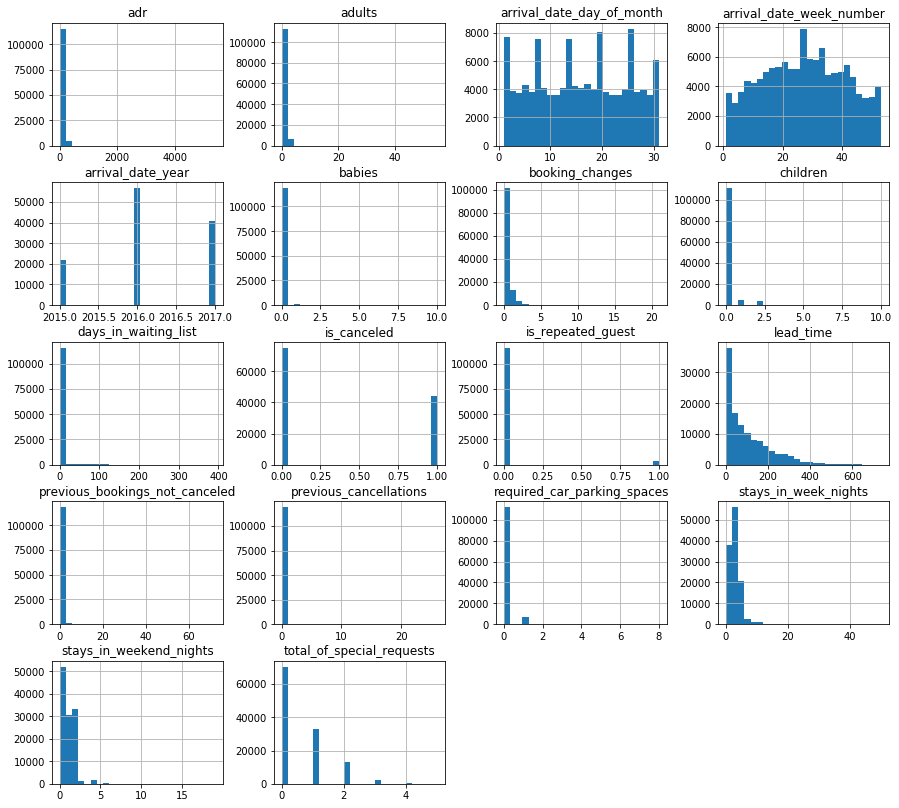

In [357]:
all_hist = hotel.hist(bins=25,figsize=(15,14))

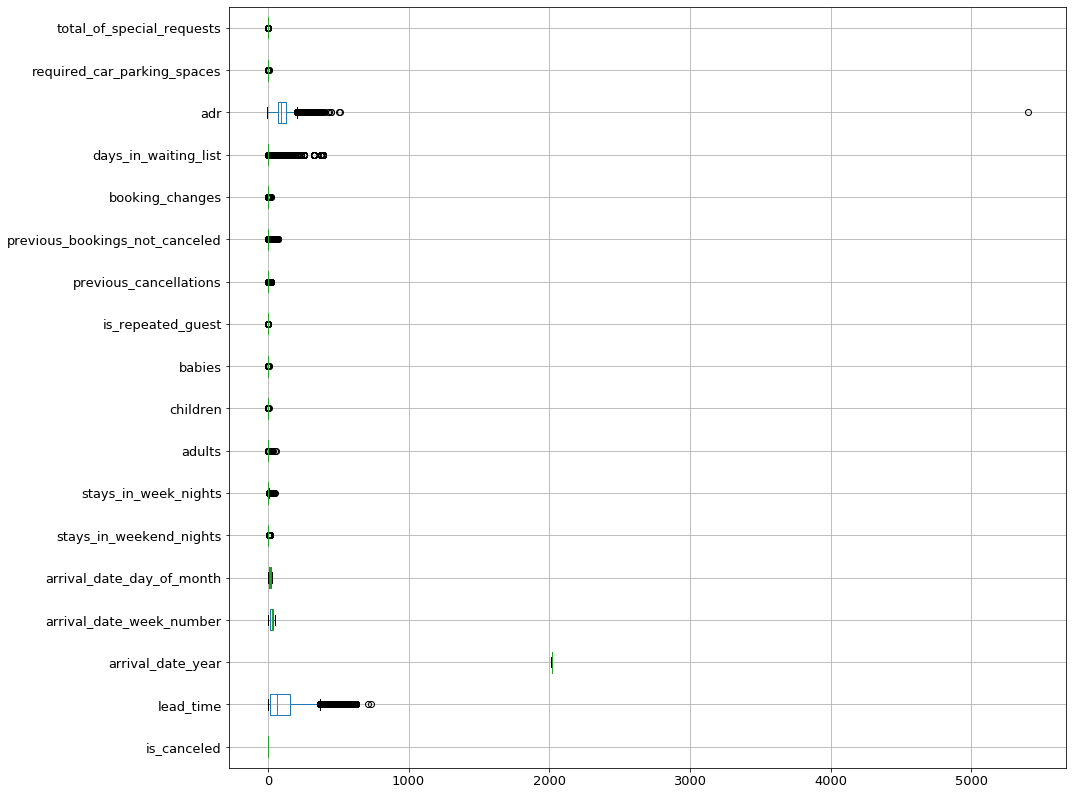

In [358]:
all_box = hotel.boxplot(vert=False,fontsize=13,figsize=(15,14))

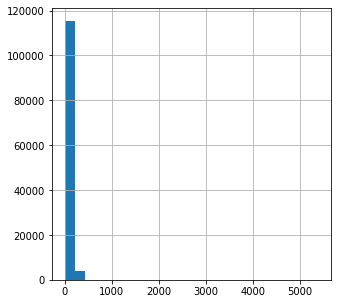

In [359]:
#  Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights, 
#and it is left skewed, with an extremely large value
hotel.adr.hist(bins=25,figsize=(5,5))

In [360]:
hotel[hotel.adr==hotel.adr.max()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12,No agent,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [361]:
hotel.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [362]:
# the assigned_room_type for this order is A, which is the most common room type. The price should not be significantly high. 
# This order is also been cancelled, this could mean that this order is cancelled because the price error.
# So I will drop this row
hotel.drop([48515], inplace=True)

In [363]:
# Check if droped
hotel.shape 

(119389, 32)

In [364]:
hotel.adults.value_counts()

2     89679
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

In [365]:
# This is a group order, could be a 55 people travel group. This makes sense. I will keep this row
hotel[hotel.adults==hotel.adults.max()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2173,Resort Hotel,1,338,2015,October,41,4,2,0,55,...,No Deposit,No agent,No agent,0,Group,0.0,0,0,Canceled,2015-01-02


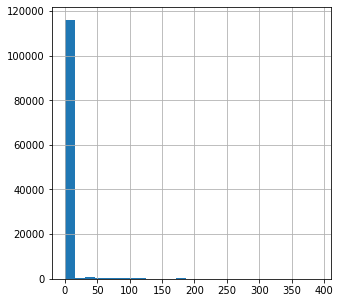

In [366]:
hotel.days_in_waiting_list.hist(bins=25,figsize=(5,5))

In [367]:
hotel.days_in_waiting_list.value_counts()

0      115691
39        227
58        164
44        141
31        127
        ...  
175         1
117         1
89          1
92          1
183         1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [368]:
# There are lots of bookings stay in the wait list for a long while.
# By seeing the barplot is left skewed, these long waiting days are unusual, but valid information
# By considering that long waiting time could be a trigger to cancellation, these information should be kept
hotel[hotel.days_in_waiting_list==hotel.days_in_waiting_list.max()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
58152,City Hotel,1,443,2016,October,41,7,0,2,2,...,Non Refund,1,No agent,391,Transient,65.0,0,0,Canceled,2016-09-20
58153,City Hotel,1,443,2016,October,41,7,0,2,2,...,Non Refund,1,No agent,391,Transient,65.0,0,0,Canceled,2016-09-20
58154,City Hotel,1,443,2016,October,41,7,0,2,2,...,Non Refund,1,No agent,391,Transient,65.0,0,0,Canceled,2016-09-20
58155,City Hotel,1,443,2016,October,41,7,0,2,2,...,Non Refund,1,No agent,391,Transient,65.0,0,0,Canceled,2016-09-20
58157,City Hotel,1,443,2016,October,41,7,0,2,2,...,Non Refund,1,No agent,391,Transient,65.0,0,0,Canceled,2016-09-20
58158,City Hotel,1,443,2016,October,41,7,0,2,2,...,Non Refund,1,No agent,391,Transient,65.0,0,0,Canceled,2016-09-20
58159,City Hotel,1,443,2016,October,41,7,0,2,2,...,Non Refund,1,No agent,391,Transient,65.0,0,0,Canceled,2016-09-20
58160,City Hotel,1,443,2016,October,41,7,0,2,2,...,Non Refund,1,No agent,391,Transient,65.0,0,0,Canceled,2016-09-20
58161,City Hotel,1,443,2016,October,41,7,0,2,2,...,Non Refund,1,No agent,391,Transient,65.0,0,0,Canceled,2016-09-20
58167,City Hotel,1,443,2016,October,41,7,0,2,2,...,Non Refund,1,No agent,391,Transient,65.0,0,0,Canceled,2016-09-20


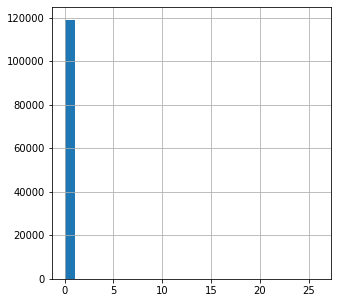

In [369]:
hotel.previous_cancellations.hist(bins=25,figsize=(5,5))

In [370]:
# previous_cancellations is also a left skewed dataset. These information seems valid, so should not be dropped
hotel.previous_cancellations.value_counts()

0     112905
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

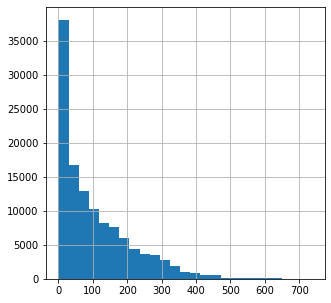

In [371]:
# lead_time is also a left skewed dataset. These information seems valid, so should not be dropped
hotel.lead_time.hist(bins=25,figsize=(5,5))

## Export data to a new csv file 

Review the data before exporting

In [372]:
hotel.shape

(119389, 32)

In [373]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119389 non-null  object        
 1   is_canceled                     119389 non-null  int64         
 2   lead_time                       119389 non-null  int64         
 3   arrival_date_year               119389 non-null  int64         
 4   arrival_date_month              119389 non-null  category      
 5   arrival_date_week_number        119389 non-null  int64         
 6   arrival_date_day_of_month       119389 non-null  int64         
 7   stays_in_weekend_nights         119389 non-null  int64         
 8   stays_in_week_nights            119389 non-null  int64         
 9   adults                          119389 non-null  int64         
 10  children                        119389 non-null  int64  

In [374]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119389.0,0.370411,0.482917,0.00,0.00,0.00,1.0,1.0
lead_time,119389.0,104.011994,106.863358,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119389.0,2016.156555,0.707479,2015.00,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,119389.0,27.165292,13.605134,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119389.0,15.798164,8.780826,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119389.0,0.927606,0.998614,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,119389.0,2.500314,1.908289,0.00,1.00,2.00,3.0,50.0
adults,119389.0,1.856402,0.579263,0.00,2.00,2.00,2.0,55.0
children,119389.0,0.103887,0.398557,0.00,0.00,0.00,0.0,10.0
babies,119389.0,0.007949,0.097437,0.00,0.00,0.00,0.0,10.0


Export data into "hotel_cleaned.csv"

In [375]:
# Create a file to store all data
#mkdir data

In [376]:
hotel.to_csv('D:\Jupyter_Notebook\Hotel_Demand\data\hotel_cleaned.csv',index=False, header=True)